In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read the input image
image = cv2.imread("my_selfie.jpg")  # Replace with path to your image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


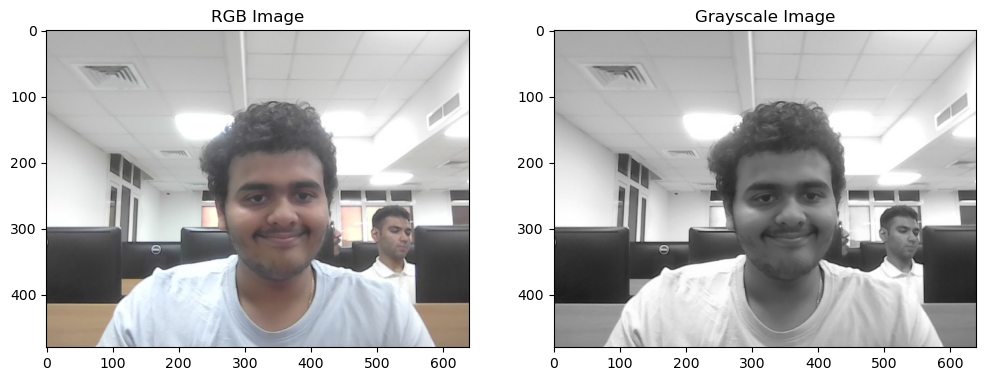

In [8]:
# List of k values for clustering
k_values = [2, 3, 5]

def kmeans_segmentation(img, is_gray, k):
    """
    Segments an image using K-means clustering.
    img: input image (RGB or grayscale)
    is_gray: True if image is grayscale, False for color
    k: number of clusters
    """
    # Prepare data for K-means
    if is_gray:
        Z = img.reshape((-1, 1)).astype(np.float32)
    else:
        Z = img.reshape((-1, 3)).astype(np.float32)
        
    # K-means criteria and running
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)

    # Print and return centroids
    print(f"Centroids (k={k}, {'gray' if is_gray else 'RGB'}):")
    print(center)
    
    # Assign pixels to cluster centroid color/intensity
    res = center[label.flatten()]
    segmented_img = res.reshape((img.shape))
    return segmented_img, center

# Display original images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title('RGB Image')
plt.subplot(1, 2, 2), plt.imshow(image_gray, cmap='gray'), plt.title('Grayscale Image')
plt.show()

Centroids (k=2, RGB):
[[105  97  94]
 [206 208 210]]
Centroids (k=2, gray):
[[207]
 [ 97]]


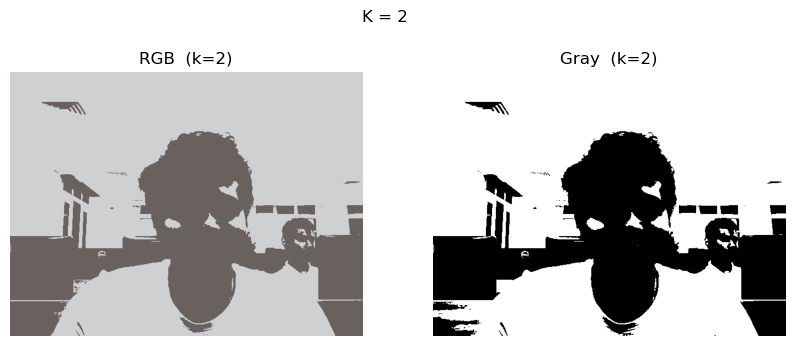

Centroids (k=3, RGB):
[[186 186 185]
 [ 98  91  89]
 [233 236 238]]
Centroids (k=3, gray):
[[183]
 [233]
 [ 91]]


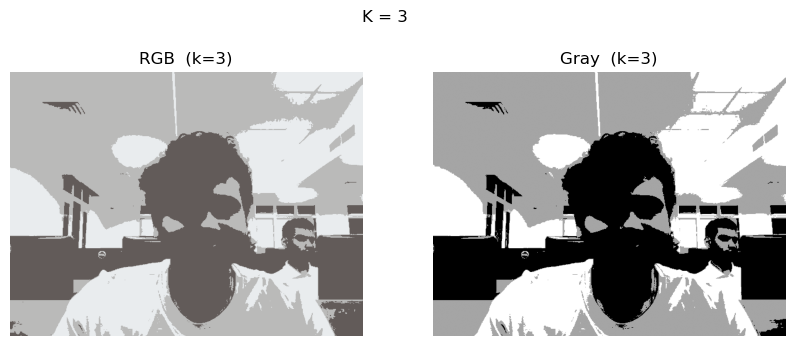

Centroids (k=5, RGB):
[[191 192 194]
 [155 139 130]
 [235 238 240]
 [ 67  66  67]
 [107  98  97]]
Centroids (k=5, gray):
[[193]
 [102]
 [238]
 [144]
 [ 67]]


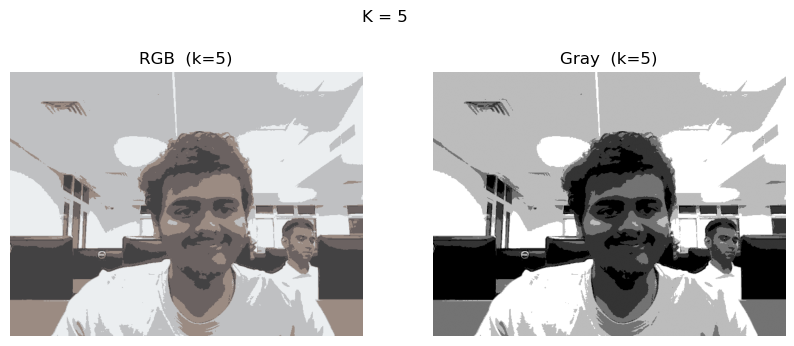

In [9]:
# Segment and display results for multiple k
for k in k_values:
    # RGB segmentation
    seg_rgb, centroids_rgb = kmeans_segmentation(image_rgb, False, k)
    # Grayscale segmentation
    seg_gray, centroids_gray = kmeans_segmentation(image_gray, True, k)
    
    # Show results
    plt.figure(figsize=(10,4))
    plt.suptitle(f"K = {k}")
    plt.subplot(1, 2, 1)
    plt.imshow(seg_rgb)
    plt.title(f'RGB  (k={k})')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(seg_gray, cmap='gray')
    plt.title(f'Gray  (k={k})')
    plt.axis('off')
    
    plt.show()

RGB+XY centroids (k=2):
[[206.61314    208.61952    210.11505      0.4982075    0.42054462]
 [105.79404     97.105       94.30752      0.50117475   0.650848  ]]
Gray+XY centroids (k=2):
[[ 97.383995     0.5135524    0.64380294]
 [207.26665      0.49219447   0.42798308]]


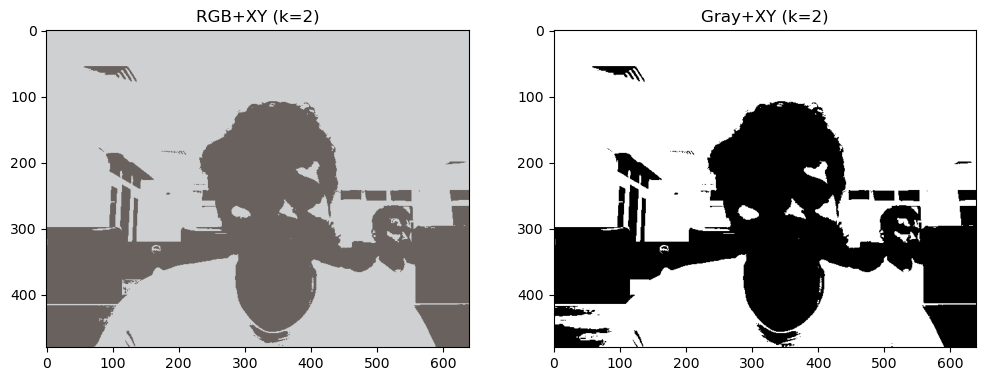

RGB+XY centroids (k=3):
[[232.55963    235.87659    238.05995      0.5616724    0.52120227]
 [ 98.57838     91.01153     89.70867      0.5190846    0.6356671 ]
 [186.2903     185.69781    185.31694      0.44561562   0.3880219 ]]
Gray+XY centroids (k=3):
[[184.25337      0.4515524    0.40717497]
 [ 91.00188      0.5075215    0.6271726 ]
 [234.71436      0.5659276    0.50911695]]


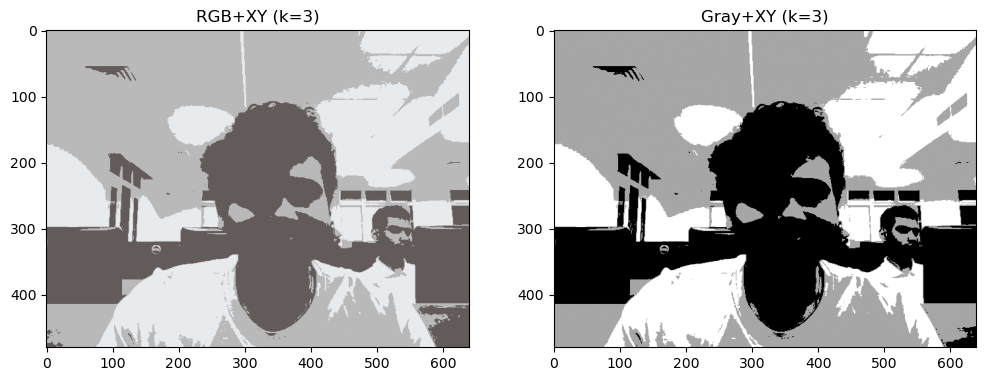

RGB+XY centroids (k=5):
[[191.28682    192.9985     194.399        0.46775615   0.34345064]
 [107.87707     98.311806    97.56779      0.5428061    0.58236223]
 [235.65562    238.98944    240.99297      0.55118346   0.5346028 ]
 [155.12837    139.7147     130.40646      0.5008857    0.69314307]
 [ 67.47524     66.15921     67.21578      0.45115197   0.6789463 ]]
Gray+XY centroids (k=5):
[[102.292015     0.54442555   0.5814589 ]
 [193.02171      0.46782967   0.3454155 ]
 [238.50888      0.5515958    0.5291548 ]
 [144.76266      0.4974383    0.6978193 ]
 [ 67.13481      0.45353794   0.67735285]]


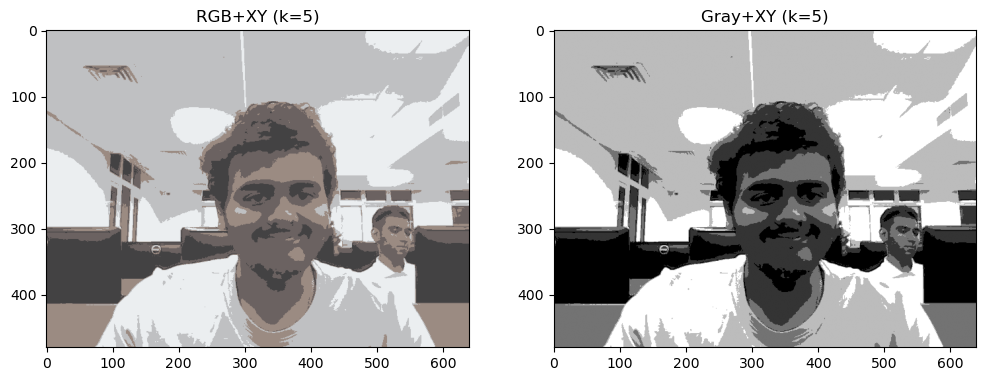

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare images
image = cv2.imread("my_selfie.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
h, w = image.shape[:2]

k_values = [2, 3, 5]  # Example k values for illustration

def kmeans_rgb_xy(img, k):
    h, w, ch = img.shape
    Z = img.reshape((-1,3))
    x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
    x_norm = (x_coords.ravel() / w).reshape(-1,1)
    y_norm = (y_coords.ravel() / h).reshape(-1,1)
    Z_xy = np.concatenate([Z, x_norm, y_norm], axis=1).astype(np.float32)
    assert Z_xy.shape == (h*w, 5)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    ret, label, center = cv2.kmeans(Z_xy, int(k), None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    center_disp = np.uint8(center[:,:3])
    print(f"RGB+XY centroids (k={k}):\n{center}")
    res = center_disp[label.flatten()]
    segmented_img = res.reshape((h,w,3))
    return segmented_img, center


def kmeans_gray_xy(img, k):
    h, w = img.shape
    Z = img.reshape((-1,1))
    x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
    x_norm = (x_coords.ravel() / w).reshape(-1,1)
    y_norm = (y_coords.ravel() / h).reshape(-1,1)
    Z_xy = np.concatenate([Z, x_norm, y_norm], axis=1).astype(np.float32)
    assert Z_xy.shape == (h*w,3)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    ret, label, center = cv2.kmeans(Z_xy, int(k), None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    print(f"Gray+XY centroids (k={k}):\n{center}")
    res = np.uint8(center[:,0])[label.flatten()]
    segmented_img = res.reshape((h,w))
    return segmented_img, center


# Display example results for both color and grayscale
for k in k_values:
    seg_rgbxy, centroids_rgbxy = kmeans_rgb_xy(image_rgb, k)
    seg_grayxy, centroids_grayxy = kmeans_gray_xy(image_gray, k)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1), plt.imshow(seg_rgbxy), plt.title(f"RGB+XY (k={k})")
    plt.subplot(1,2,2), plt.imshow(seg_grayxy, cmap='gray'), plt.title(f"Gray+XY (k={k})")
    plt.show()
